# Recurrent Neural Network

# Part 1 - Data Preprocessing

### Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the training set

In [2]:
dataset_train = pd.read_csv('../data/Part 3 - Recurrent Neural Networks (RNN)/Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values # Numpy array로 바꿈
training_set[:5]

array([[325.25],
       [331.27],
       [329.83],
       [328.34],
       [322.04]])

### Feature Scaling

In [3]:
# 데이터 정규화 or 표준화
# 여기서는 표준화를 이용
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)
training_set_scaled[:5]

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       [0.09156187],
       [0.07984225]])

### Creating a data structure with 60 timesteps and 1 output

In [4]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

### Reshaping

In [5]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(1198, 60, 1)

# Part 2 - Building the RNN

### Importing the Keras libraries and packages

In [6]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Initializing the RNN

In [7]:
regressor = Sequential()

### Adding the first LSTM layer and some Dropout regularisation

In [8]:
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Adding the second LSTM layer and some Dropout regularisation

In [9]:
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

### Adding the third LSTM layer and some Dropout regularisation

In [10]:
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

### Adding the fourth LSTM layer and some Dropout regularisation

In [12]:
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

### Adding the output layer

In [13]:
regressor.add(Dense(units=1))

### Compiling the RNN

In [14]:
regressor.compile(optimizer='adam', loss='mean_squared_error')

### Fitting the RNN to the Training set

In [15]:
regressor.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.0829
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0061
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0059
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0058
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0055
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0049
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0049
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0051
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0043
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0038
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0043
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0042
Epoch 13/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0041
Epoch 14/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0042
Epoch 15/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - lo

# Part 3 - Making the predictions and visualizing the results

### Getting the real stock price of 2017

In [16]:
dataset_test = pd.read_csv('../data/Part 3 - Recurrent Neural Networks (RNN)/Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values # Numpy array로 바꿈
real_stock_price[:5]

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ]])

### Getting the predicted stock price of 2017

In [17]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis=0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


### Visualizing the results

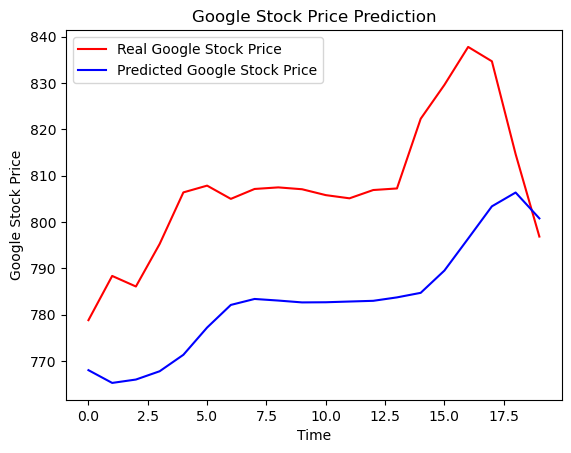

In [18]:
plt.plot(real_stock_price, color='red', label='Real Google Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()